# HDBSCAN










In [1]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table
import hdbscan
import seaborn as sns

In [2]:
# Read the file with pandas
df = pd.read_csv('../HYDRA_errorsall_flag.csv')

print ("Shape of the DataFrame: ", df.shape)
df.head(3)

Shape of the DataFrame:  (1205460, 33)


,Field,ID,RA,DEC,FWHM,ISOarea,KRON_RADIUS,nDet_magPStotal,PhotoFlagDet,U_PStotal,...,e_F395_PStotal,e_F410_PStotal,e_F430_PStotal,e_G_PStotal,e_F515_PStotal,e_R_PStotal,e_F660_PStotal,e_I_PStotal,e_F861_PStotal,e_Z_PStotal
0,HYDRA-D-0001,iDR3.HYDRA-D-0001.000094,157.772094,-35.345371,2.728279,97,3.161331,12.0,0,19.453148,...,0.083962,0.026782,0.021450,0.005638,0.011155,0.003497,0.004027,0.003373,0.005972,0.004359
1,HYDRA-D-0001,iDR3.HYDRA-D-0001.000175,158.199458,-35.345011,3.056910,83,3.115160,12.0,2,19.585379,...,0.047952,0.017442,0.015952,0.004891,0.009392,0.003286,0.003927,0.003454,0.006114,0.004483
2,HYDRA-D-0001,iDR3.HYDRA-D-0001.000212,157.713716,-35.343128,2.664692,161,3.100008,12.0,2,18.318386,...,0.021907,0.013154,0.011937,0.003821,0.007114,0.002641,0.002998,0.002605,0.004574,0.003376


In [3]:
# check the nan values in the dataframe 
df.isna().sum()

Field              0
ID                 0
RA                 0
DEC                0
FWHM               0
ISOarea            0
KRON_RADIUS        0
nDet_magPStotal    0
PhotoFlagDet       0
U_PStotal          0
F378_PStotal       0
F395_PStotal       0
F410_PStotal       0
F430_PStotal       0
G_PStotal          0
F515_PStotal       0
R_PStotal          0
F660_PStotal       0
I_PStotal          0
F861_PStotal       0
Z_PStotal          0
e_U_PStotal        0
e_F378_PStotal     0
e_F395_PStotal     0
e_F410_PStotal     0
e_F430_PStotal     0
e_G_PStotal        0
e_F515_PStotal     0
e_R_PStotal        0
e_F660_PStotal     0
e_I_PStotal        0
e_F861_PStotal     0
e_Z_PStotal        0
dtype: int64

In [4]:
# Selecting colums
df_clus_temp = df[["U_PStotal", "F378_PStotal", "F395_PStotal", "F410_PStotal", "F430_PStotal", "G_PStotal", "F515_PStotal", "R_PStotal", "F660_PStotal", "I_PStotal", "F861_PStotal", "Z_PStotal"]]
df_clus_temp.shape

(1205460, 12)

In [5]:
# Standarized the data
df_clus_temp_stand = StandardScaler().fit_transform(df_clus_temp)
df_clus_temp_stand.shape

(1205460, 12)

In [6]:
# Applying HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=40, min_cluster_size=60, prediction_data=True).fit(df_clus_temp_stand)
labels = clusterer.labels_

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_noise_ = list(labels).count(-1)

In [8]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of noise points: %d' % n_noise_)

# Add labels
df['HDBSCAN_opt_labels'] = labels

Estimated number of clusters: 2
Estimated number of cluster points 0: 122
Estimated number of cluster points 1: 1191359
Estimated number of cluster points 2: 0
Estimated number of noise points: 13979


In [9]:
# Colors
r_i = df["R_PStotal"] - df["I_PStotal"]
r_ha = df["R_PStotal"] - df["F660_PStotal"]

/home/luis/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


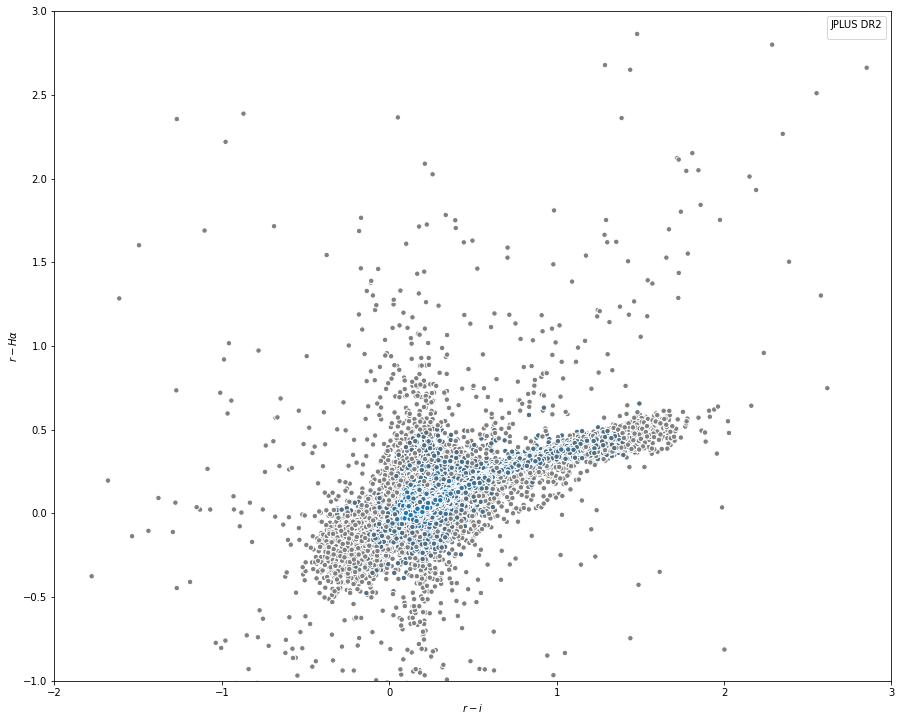

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig, ax = plt.subplots(figsize=(15, 15))
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax.scatter(
    r_i,
    r_ha,
    s=30,
    c=cluster_member_colors,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.0, 3.0],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax.set_aspect("equal")

In [11]:
df.head(3)

,Field,ID,RA,DEC,FWHM,ISOarea,KRON_RADIUS,nDet_magPStotal,PhotoFlagDet,U_PStotal,...,e_F410_PStotal,e_F430_PStotal,e_G_PStotal,e_F515_PStotal,e_R_PStotal,e_F660_PStotal,e_I_PStotal,e_F861_PStotal,e_Z_PStotal,HDBSCAN_opt_labels
0,HYDRA-D-0001,iDR3.HYDRA-D-0001.000094,157.772094,-35.345371,2.728279,97,3.161331,12.0,0,19.453148,...,0.026782,0.021450,0.005638,0.011155,0.003497,0.004027,0.003373,0.005972,0.004359,1
1,HYDRA-D-0001,iDR3.HYDRA-D-0001.000175,158.199458,-35.345011,3.056910,83,3.115160,12.0,2,19.585379,...,0.017442,0.015952,0.004891,0.009392,0.003286,0.003927,0.003454,0.006114,0.004483,-1
2,HYDRA-D-0001,iDR3.HYDRA-D-0001.000212,157.713716,-35.343128,2.664692,161,3.100008,12.0,2,18.318386,...,0.013154,0.011937,0.003821,0.007114,0.002641,0.002998,0.002605,0.004574,0.003376,1


Creating the tables.

In [12]:
# 1 cluster
# Mask 
mask = df['HDBSCAN_opt_labels'] == 0
# Applying mask
df_0 = df[mask]

# 2 cluster
# Mask model 4 eps = 0.25
mask1 = df['HDBSCAN_opt_labels'] == 1
# Applying mask
df_1 = df[mask1]

# 3 cluster
# Mask model 4 eps = 0.25
mask2 = df['HDBSCAN_opt_labels'] == 2
# Applying mask
df_2 = df[mask2]

# noise
mask_noise = df['HDBSCAN_opt_labels'] == -1
# Applying mask
df_noise = df[mask_noise]

print("Cluster 0 %d" % len(df_0))
print("Cluster 1 %d" % len(df_1))
print("Cluster 2 %d" % len(df_2))
print("Noise %d" % len(df_noise))

Cluster 0 122
Cluster 1 1191359
Cluster 2 0
Noise 13979


# Plotting again

In [13]:
# definition for the colors
def colour(table, f1, f2, f3, f4):
    xcolour = table[f1] - table[f2]
    ycolour = table[f3] - table[f4]
    return xcolour, ycolour

In [14]:
cx_0, cy_0 = colour(df_0, "R_PStotal", "I_PStotal", "R_PStotal", "F660_PStotal")
cx_1, cy_1 = colour(df_1, "R_PStotal", "I_PStotal", "R_PStotal", "F660_PStotal")
cx_2, cy_2 = colour(df_2, "R_PStotal", "I_PStotal", "R_PStotal", "F660_PStotal")
cx_noise, cy_noise = colour(df_noise, "R_PStotal", "I_PStotal", "R_PStotal", "F660_PStotal")

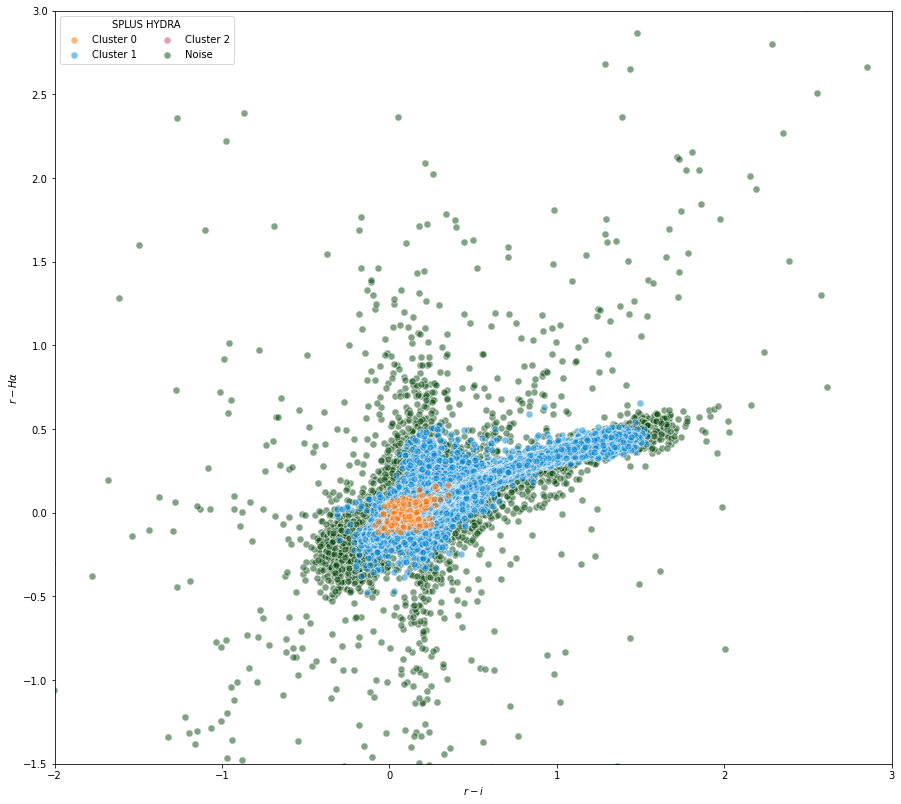

In [15]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig, ax1 = plt.subplots(figsize=(15, 15))
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax1.scatter(
    cx_0, cy_0,
    s=50,
    c=sns.xkcd_rgb['orange'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=5.0, label = "Cluster 0")
scatter = ax1.scatter(
    cx_1, cy_1,
    s=50,
    c=sns.xkcd_rgb['cerulean'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 1")
ax1.scatter(
    cx_2, cy_2,
    s=50,
    c=sns.xkcd_rgb['dark pink'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=3.0, label = "Cluster 2")
ax1.scatter(
    cx_noise, cy_noise,
    c=sns.xkcd_rgb['forest green'],
    s=50,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="gray", alpha = 0.5, zorder=1.0, label = "Noise")
ax1.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.5, 3.0],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$", 
)
ax1.legend(ncol=2).set_title("SPLUS HYDRA")
ax1.set_aspect("equal")

I found 2 cluster and the noise. Clearly, the noise include the H𝛼 emitters population. I think The cluster 2 is the ms and giant locus. I have to compare with the modelled grid of Pickles to be sure. And for the cluster 0, I am not sure what is it.

# Least-squares fitting to the MS and Giant locus

In [16]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
    return a * x + b

In [17]:
# curve fit
popt, _ = curve_fit(objective, cx_1, cy_1)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.42744 * x + -0.04264


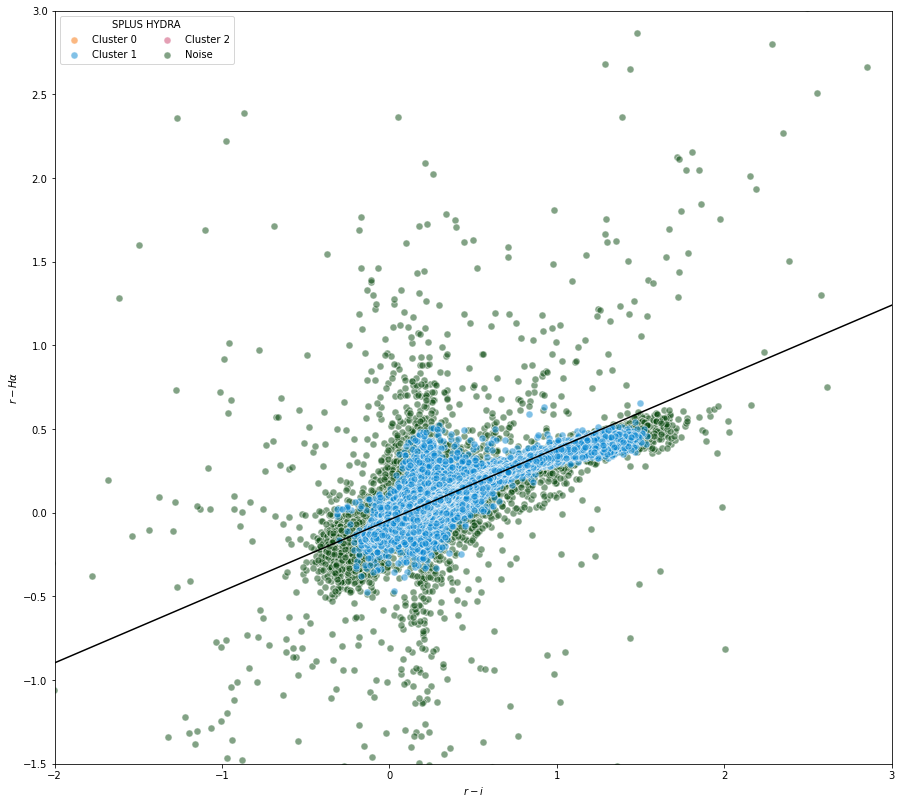

In [18]:
# Ploting again considering the fit
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig, ax2 = plt.subplots(figsize=(15, 15))

fit_line = np.linspace(-3.0, 3.0)
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax2.scatter(
    cx_0, cy_0,
    s=50,
    c=sns.xkcd_rgb['orange'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 0")
scatter = ax2.scatter(
    cx_1, cy_1,
    s=50,
    c=sns.xkcd_rgb['cerulean'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 1")
ax2.scatter(
    cx_2, cy_2,
    s=50,
    c=sns.xkcd_rgb['dark pink'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=3.0, label = "Cluster 2")
ax2.scatter(
    cx_noise, cy_noise,
    c=sns.xkcd_rgb['forest green'],
    s=50,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="gray", alpha = 0.5, zorder=1.0, label = "Noise")
ax2.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.5, 3.0],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$", 
)
ax2.plot(fit_line, 0.42724 * fit_line -0.04261, color="k", zorder = 6)
ax2.legend(ncol=2).set_title("SPLUS HYDRA")
ax2.set_aspect("equal")

# Applying sigma clipping

𝐍𝐨𝐰 𝐟𝐫𝐨𝐦 𝐚𝐬𝐭𝐫𝐨𝐩𝐲.𝐦𝐨𝐝𝐞𝐥𝐢𝐧𝐠 𝐢𝐦𝐩𝐨𝐫𝐭 𝐦𝐨𝐝𝐞𝐥𝐬, 𝐟𝐢𝐭𝐭𝐢𝐧𝐠

In [46]:
from astropy.modeling import models, fitting
from astropy.stats import sigma_clip

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line = fit(line_init, cx_1, cy_1)
fitted_line

<Linear1D(slope=0.42743817, intercept=-0.04263991)>

In [47]:
# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=4, sigma=4.0)


# fit the data with the fitter
fitted_line_, mask = or_fit(line_init, cx_1, cy_1)
filtered_data = np.ma.masked_array(cy_1, mask=mask)

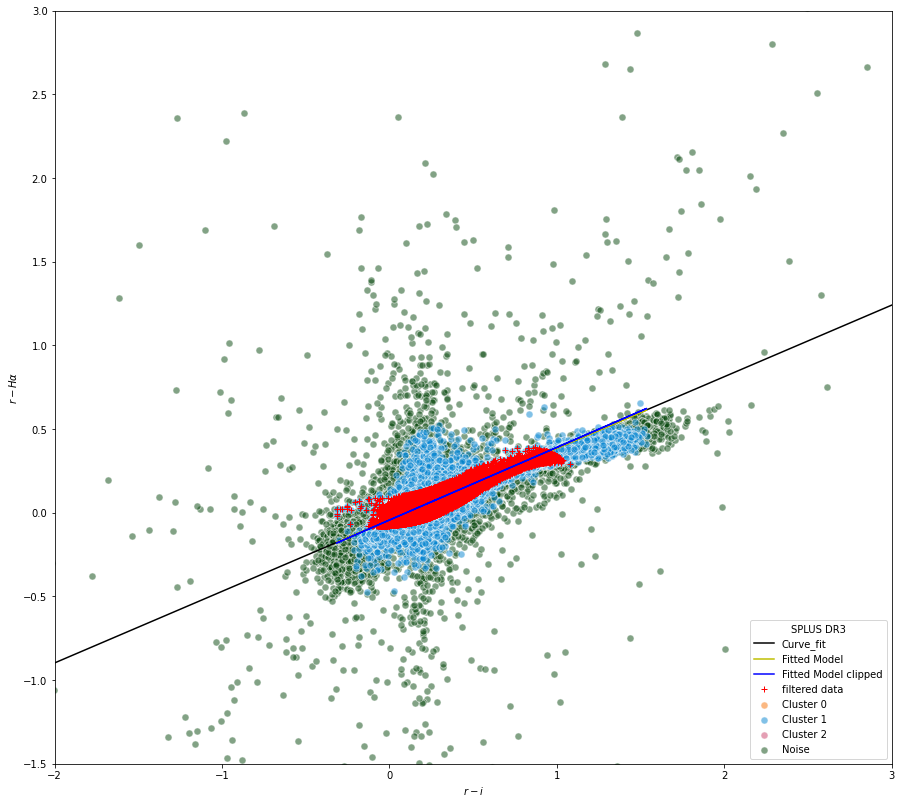

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

color_palette = sns.color_palette('Paired', 12)
fig, ax3 = plt.subplots(figsize=(15, 15))
fit_line = np.linspace(-3.0, 3.0)
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax3.scatter(
    cx_0, cy_0,
    s=50,
    c=sns.xkcd_rgb['orange'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 0")
scatter = ax3.scatter(
    cx_1, cy_1,
    s=50,
    c=sns.xkcd_rgb['cerulean'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 1")
ax3.scatter(
    cx_2, cy_2,
    s=50,
    c=sns.xkcd_rgb['dark pink'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=3.0, label = "Cluster 2")
ax3.scatter(
    cx_noise, cy_noise,
    c=sns.xkcd_rgb['forest green'],
    s=50,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="gray", alpha = 0.5, zorder=1.0, label = "Noise")
ax3.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.5, 3.0],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$", 
)
ax3.plot(fit_line, 0.42744 * fit_line  -0.04264, color="k", zorder = 6, label='Curve_fit')
#plt.plot(cx_0, line_orig(cx_0), 'b-', label='Simulation Model')
plt.plot(cx_1, fitted_line(cx_1), 'y-', zorder = 6, label='Fitted Model')
#plt.plot(cx_0, filtered_data, "ko", label="Fitted Data")
plt.plot(cx_1, fitted_line_(cx_1), 'b-', zorder = 7, label='Fitted Model clipped')
plt.plot(cx_1, filtered_data, 'r+', zorder=6, label="filtered data")
ax3.legend(ncol=1).set_title("SPLUS DR3")
ax3.set_aspect("equal")

# Other tecnique for sigma clipping

In [49]:
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)

In [60]:
# initialize fitters
fit1 = fitting.LevMarLSQFitter()
or_fit1 = fitting.FittingWithOutlierRemoval(fit1, sigma_clip,
                                           niter=4, sigma=4.0)

In [64]:
# get fitted model and filtered data
or_fitted_model, mask1 = or_fit1(g_init, cx_1, cy_1)
filtered_data1 = np.ma.masked_array(cy_1, mask=mask1)
fitted_model1 = fit1(g_init, cx_1, cy_1)

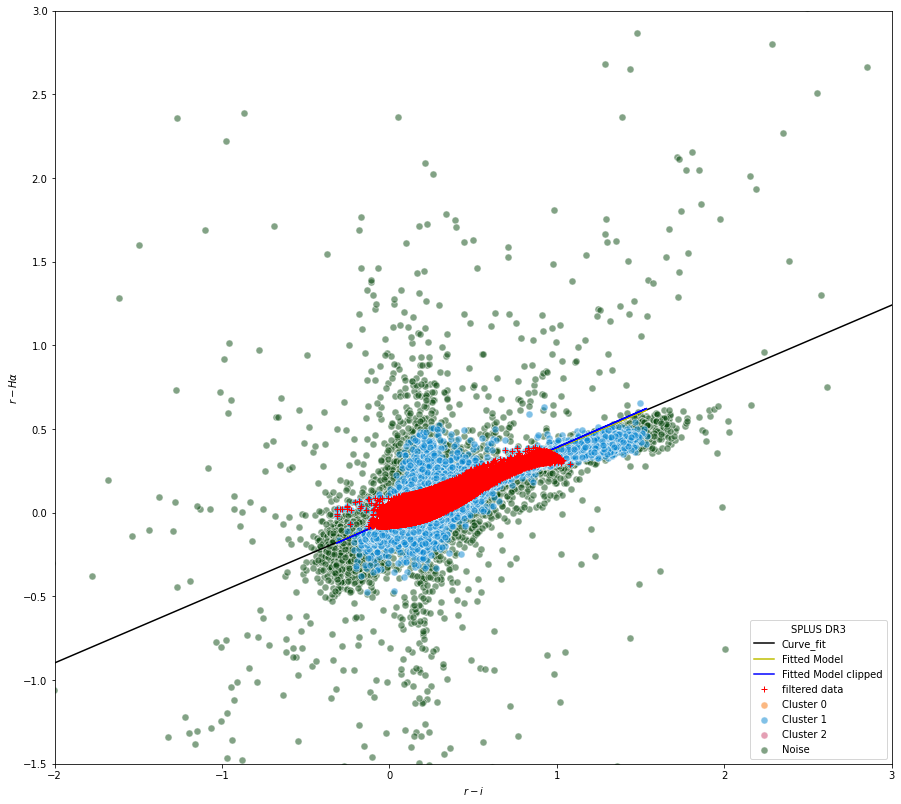

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

color_palette = sns.color_palette('Paired', 12)
fig, ax4 = plt.subplots(figsize=(15, 15))
fit_line = np.linspace(-3.0, 3.0)
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax4.scatter(
    cx_0, cy_0,
    s=50,
    c=sns.xkcd_rgb['orange'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 0")
scatter = ax4.scatter(
    cx_1, cy_1,
    s=50,
    c=sns.xkcd_rgb['cerulean'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=4.0, label = "Cluster 1")
ax4.scatter(
    cx_2, cy_2,
    s=50,
    c=sns.xkcd_rgb['dark pink'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic", alpha = 0.5, zorder=3.0, label = "Cluster 2")
ax4.scatter(
    cx_noise, cy_noise,
    c=sns.xkcd_rgb['forest green'],
    s=50,
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="gray", alpha = 0.5, zorder=1.0, label = "Noise")
ax4.set(
    xlim=[-2.0, 3.0],
    ylim=[-1.5, 3.0],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$", 
)
ax4.plot(fit_line, 0.42744 * fit_line  -0.04264, color="k", zorder = 6, label='Curve_fit')
#plt.plot(cx_0, line_orig(cx_0), 'b-', label='Simulation Model')
plt.plot(cx_1, fitted_line(cx_1), 'y-', zorder = 6, label='Fitted Model')
#plt.plot(cx_0, filtered_data, "ko", label="Fitted Data")
plt.plot(cx_1, fitted_line_(cx_1), 'b-', zorder = 7, label='Fitted Model clipped')
plt.plot(cx_1, filtered_data, 'r+', zorder=8, label="filtered data")
#plt.plot(cx_1, fitted_model(cx_1), 'g-',
         #label="model fitted w/ original data")
#plt.plot(cx_1, or_fitted_model(cx_1), 'r-')#, label="model fitted w/ filtered data")
ax4.legend(ncol=1).set_title("SPLUS DR3")
ax4.set_aspect("equal")

$\textbf{Save the resulting clusters}$

In [52]:
from pathlib import Path
ROOT_PATH = Path("..")

In [55]:
# Save table, cluster 0
asciifile = "hydra_HDBcluster0_mins40_mincs60.ecsv" 
Table.from_pandas(df_0).write(ROOT_PATH / asciifile, format="ascii.ecsv")

In [56]:
# Save table, cluster 1
asciifile1 = "hydra_HDBcluster1_mins40_mincs60.ecsv" 
Table.from_pandas(df_1).write(ROOT_PATH / asciifile1, format="ascii.ecsv")

In [58]:
# Save table, cluster 1
asciifile2 = "hydra_HDBclusterNoise_mins40_mincs60.ecsv" 
Table.from_pandas(df_noise).write(ROOT_PATH / asciifile2, format="ascii.ecsv")